<a href="https://colab.research.google.com/github/ujs/cifar10/blob/master/cifar10_keras_drop_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   model4- Baseline + Dropout + Data Augmentation

In [0]:
#Importing libraries
from matplotlib import pyplot as plt
import pandas as pd
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:

#importing data
from keras.datasets import cifar10

#load data
(x, y),(x_test, y_test) = cifar10.load_data()

In [0]:
#examine shape of data
print (x.shape)
print (x_test.shape)
print (y.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
#Splitting x,y data into train and validation data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
#Data Preprocessing

#one-hot encode target values
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


#Rescaling images 

train_datagen = ImageDataGenerator (rescale = 1./255)
val_datagen = ImageDataGenerator (rescale = 1./255)
test_datagen = ImageDataGenerator (rescale = 1./255)

train_generator = train_datagen.flow(x_train, y_train,batch_size = 64)
val_generator = val_datagen.flow(x_val, y_val)


In [0]:
def test_model(model):
  #Instantiate model
  model = model()

  #fit model
  steps = x_train.shape[0]/64
  history = model.fit_generator(train_generator, steps_per_epoch = steps, epochs = 80, validation_data = val_generator)
  model.save('cifar10_{}'.format(model))

  #Plot loss
  plt.subplot(211)
  plt.title('cross-entropy loss')
  plt.plot(history.history['loss'],color = 'blue', label = 'train')
  plt.plot(history.history['val_loss'], color = 'red', label = 'validation')
  plt.legend()

  #plot accurcay
  plt.subplot(212)
  plt.title('accuracy')
  plt.plot(history.history['acc'],color = 'blue', label = 'train')
  plt.plot(history.history['val_acc'], color = 'red', label = 'validation')
  plt.legend()

  # evaluate model
  _, acc = model.evaluate(val_generator, verbose=0)
  print('> %.3f' % (acc * 100.0))
  return acc






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/80
625/625 [==============================] - 322s 515ms/step - loss: 2.1019 - acc: 0.2179 - val_loss: 1.8424 - val_acc: 0.3225
Epoch 2/80
625/625 [==============================] - 326s 522ms/step - loss: 1.8148 - acc: 0.3267 - val_loss: 1.6421 - val_acc: 0.3925
Epoch 3/80
625/625 [==============================] - 329s 526ms/step - loss: 1.6724 - acc: 0.3826 - val_loss: 1.4997 - val_acc: 0.4472
Epoch 4/80
625/625 [==============================] - 327s 523ms/step - loss: 1.5874 - acc: 0.4131 - val_loss: 1.4246 - val_acc: 0.4790
Epoch 5/80
625/625 [==============================] - 326s 522ms/step - loss: 1.5222 - acc: 0.4417 - val_loss: 1.3449 - val_acc: 0.5148
Epoch 6/80
625/625 [==============================] - 326s 522ms/step - loss: 1.4726 - acc: 0.4622 - val

0.7894

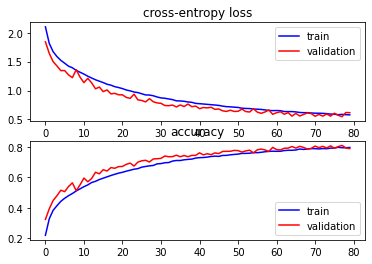

In [0]:
#model4- Baseline + Dropout + Data Augmentation
def model4():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation ='relu', kernel_initializer='he_uniform', padding = 'same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding = 'same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding = 'same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding = 'same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding = 'same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding = 'same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#data augmentation
train_datagen = ImageDataGenerator (rescale = 1./255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_generator = train_datagen.flow(x_train, y_train,batch_size = 64)

#testing
test_model(model4)
